# This notebook demonstrates the results of the updated 730nm SPC mode for the Roman Space Telescope. 

In [4]:
from astropy.io import fits
import astropy.units as u
import webbpsf
from webbpsf import wfirst
import ipywidgets
import numpy
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle
plt.rcParams.update({'image.origin': 'lower',
                     'image.interpolation':"nearest"})
import os
from pathlib import Path
import numpy as np

webbpsf.setup_logging()
webbpsfdir = Path('/home/u21/kianmilani/webbpsf-data/CGI/optics')
f730dir = webbpsfdir/'F730'

WebbPSF log messages of level INFO and above will be shown.
WebbPSF log outputs will be directed to the screen.


## The updated mode now uses Phase-B data files which must be updated in order for the correct pixel scales to be used in the process. The files that are altered here are the shaped pupil file, the focal plane mask file, and the lyot stop file.

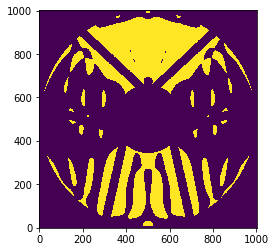

In [5]:
# First is the shapedpupil file
f730spm_fname = f730dir/'SPM_SPC-20190130.fits'
f730spm = fits.open(f730spm_fname, mode='update')

f730spm_data = f730spm[0].data

f730spm[0].header['PUPLDIAM'] = 2.3631
f730spm[0].header['PUPLSCAL'] = 2.3631/1000

f730spm.close()

plt.imshow(f730spm_data)

0.0006371855129295431 arcsec 0.01


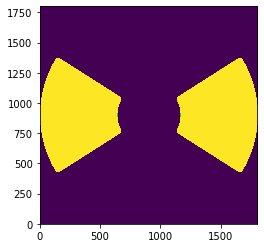

In [7]:
# Next is the FPM file for which the pixel scale must be calculated first based on lambda/D information
lamc = 730e-9*u.m
D = 2.3631*u.m
lamD730 = lamc/D
mas_per_lamD = lamc * 360.0 * 3600.0 / (2 * np.pi * D) * 1000    # mas per lambda0/D
as_per_lamD = lamc * 360.0 * 3600.0 / (2 * np.pi * D)    # as per lambda0/D
f730fpm_pxscl = (lamD730/100*u.radian).to(u.arcsecond)
print(f730fpm_pxscl, f730fpm_pxscl.value/as_per_lamD)

f730fpm_fname = f730dir/'FPM_res100_SPC-20190130.fits'
f730fpm = fits.open(f730fpm_fname, mode='update')

f730fpm_data = f730fpm[0].data
f730fpm[0].header['PIXSCALE'] = f730fpm_pxscl.value

f730fpm.close()

plt.imshow(f730fpm_data)

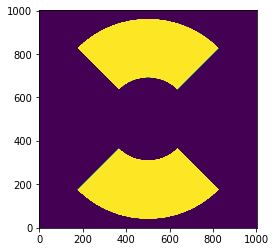

In [8]:
# Last is the lyot stop file
f730ls_fname = f730dir/'LS_SPC-20190130.fits'
f730ls = fits.open(f730ls_fname, mode='update')

f730ls_data = f730ls[0].data

f730ls[0].header['PUPLDIAM'] = 2.3631
f730ls[0].header['PUPLSCAL'] = 2.3631/1000

f730ls.close()

plt.imshow(f730ls_data)

## Now the mode for the SPC 730 mode can be used. 

[webbpsf] Set the following optical configuration:
[webbpsf] camera = IFS, filter = F730, apodizer = CHARSPC730, fpm = CHARSPC_F730_BOWTIE, lyotstop = LS_F730
[  poppy] No source spectrum supplied, therefore defaulting to 5700 K blackbody
[  poppy] Computing wavelength weights using synthetic photometry for F730...
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /home/u21/kianmilani/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /home/u21/kianmilani/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /home/u21/kianmilani/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[  poppy] Added image

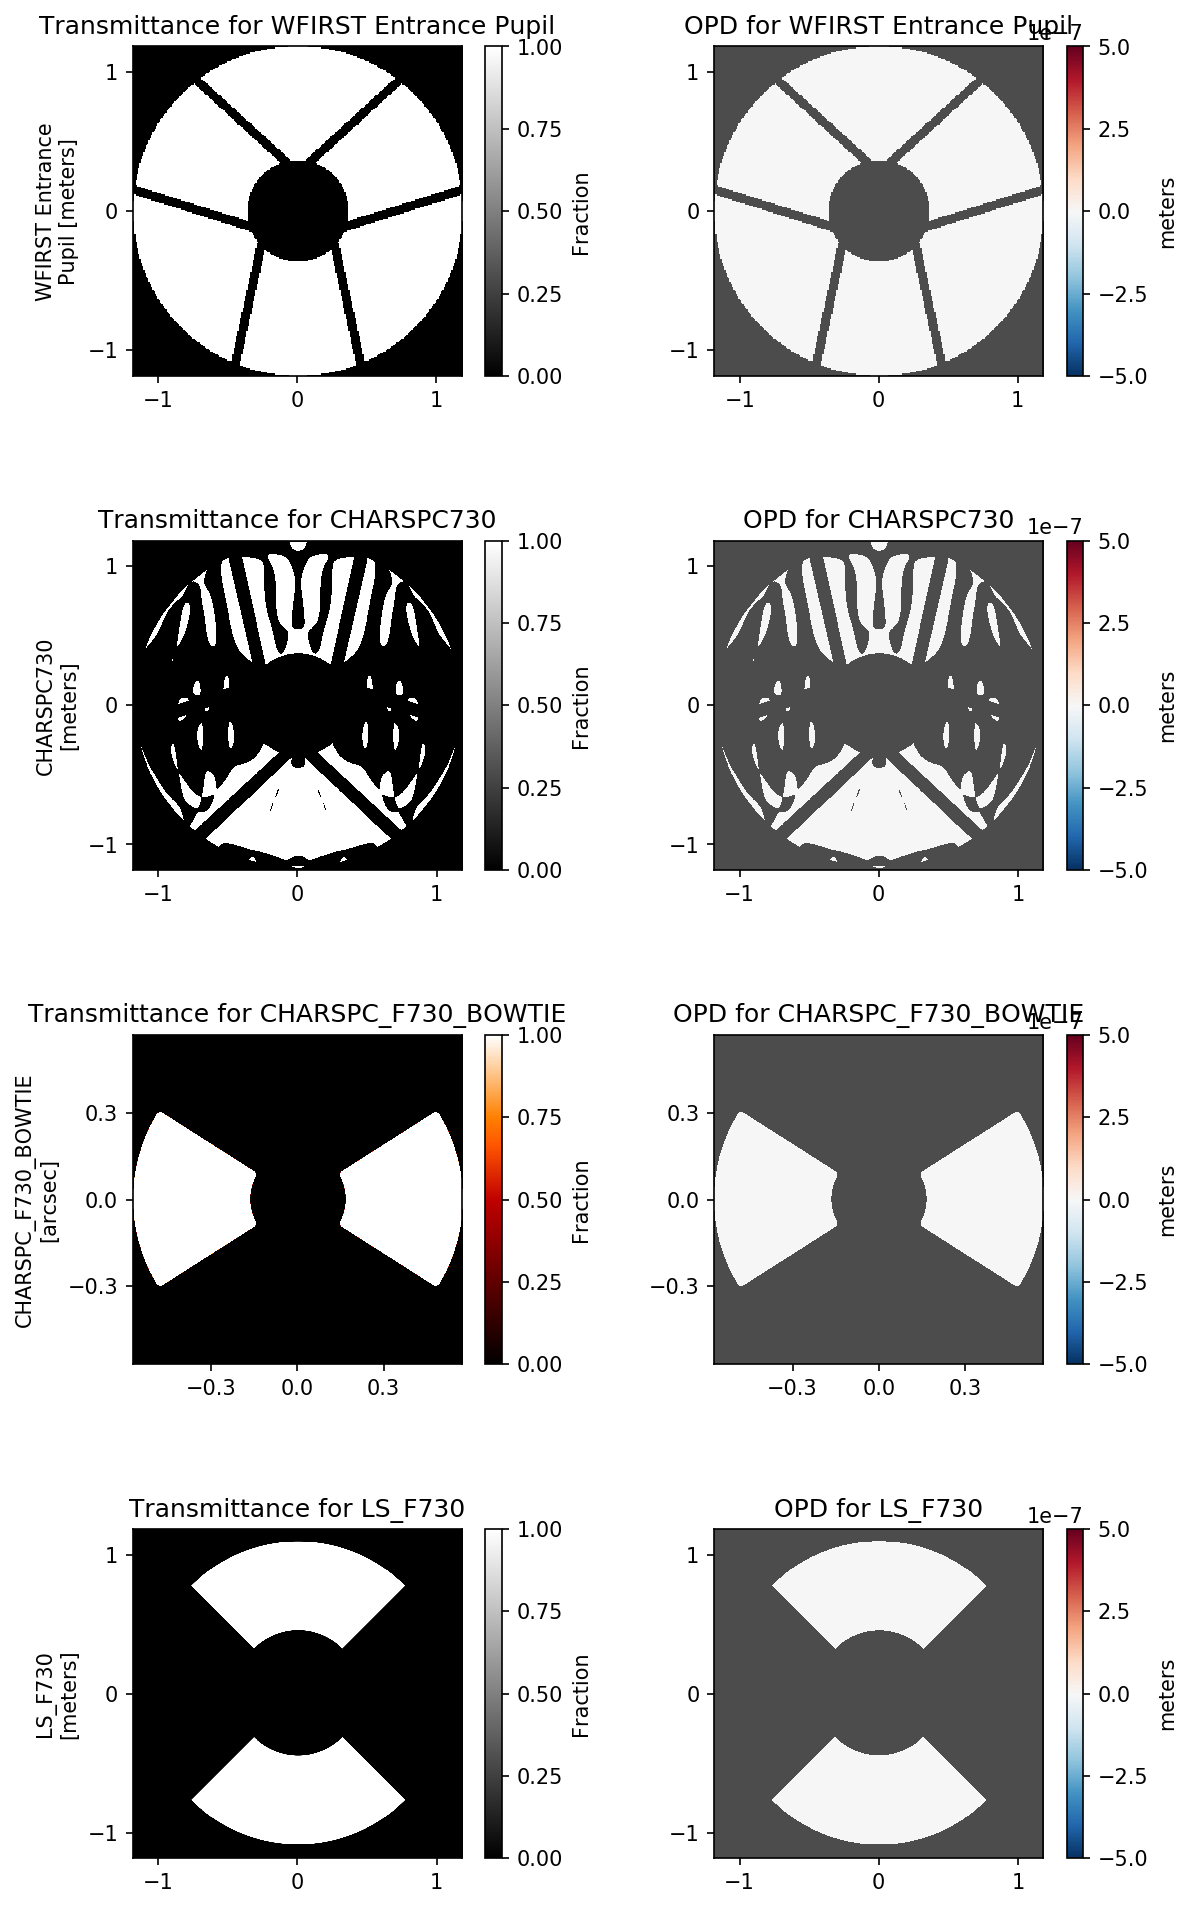

In [43]:
reload(wfirst)
spc730 = wfirst.CGI(mode='CHARSPC_F730')
plt.figure(figsize=(9,16), dpi=150)
spc730.display()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.5)

[  poppy] No source spectrum supplied, therefore defaulting to 5700 K blackbody
[  poppy] PSF calc using fov_arcsec = 1.600000, oversample = 4, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /home/u21/kianmilani/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /home/u21/kianmilani/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /home/u21/kianmilani/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[  poppy] Added image plane: CHARSPC_F730_BOWTIE
[  poppy] LS_F730: Loaded amplitude transmission from /home/u21/kianmilani/webbpsf-data/CGI/optics/F730/LS_SPC-20190130

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 1.478 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 4


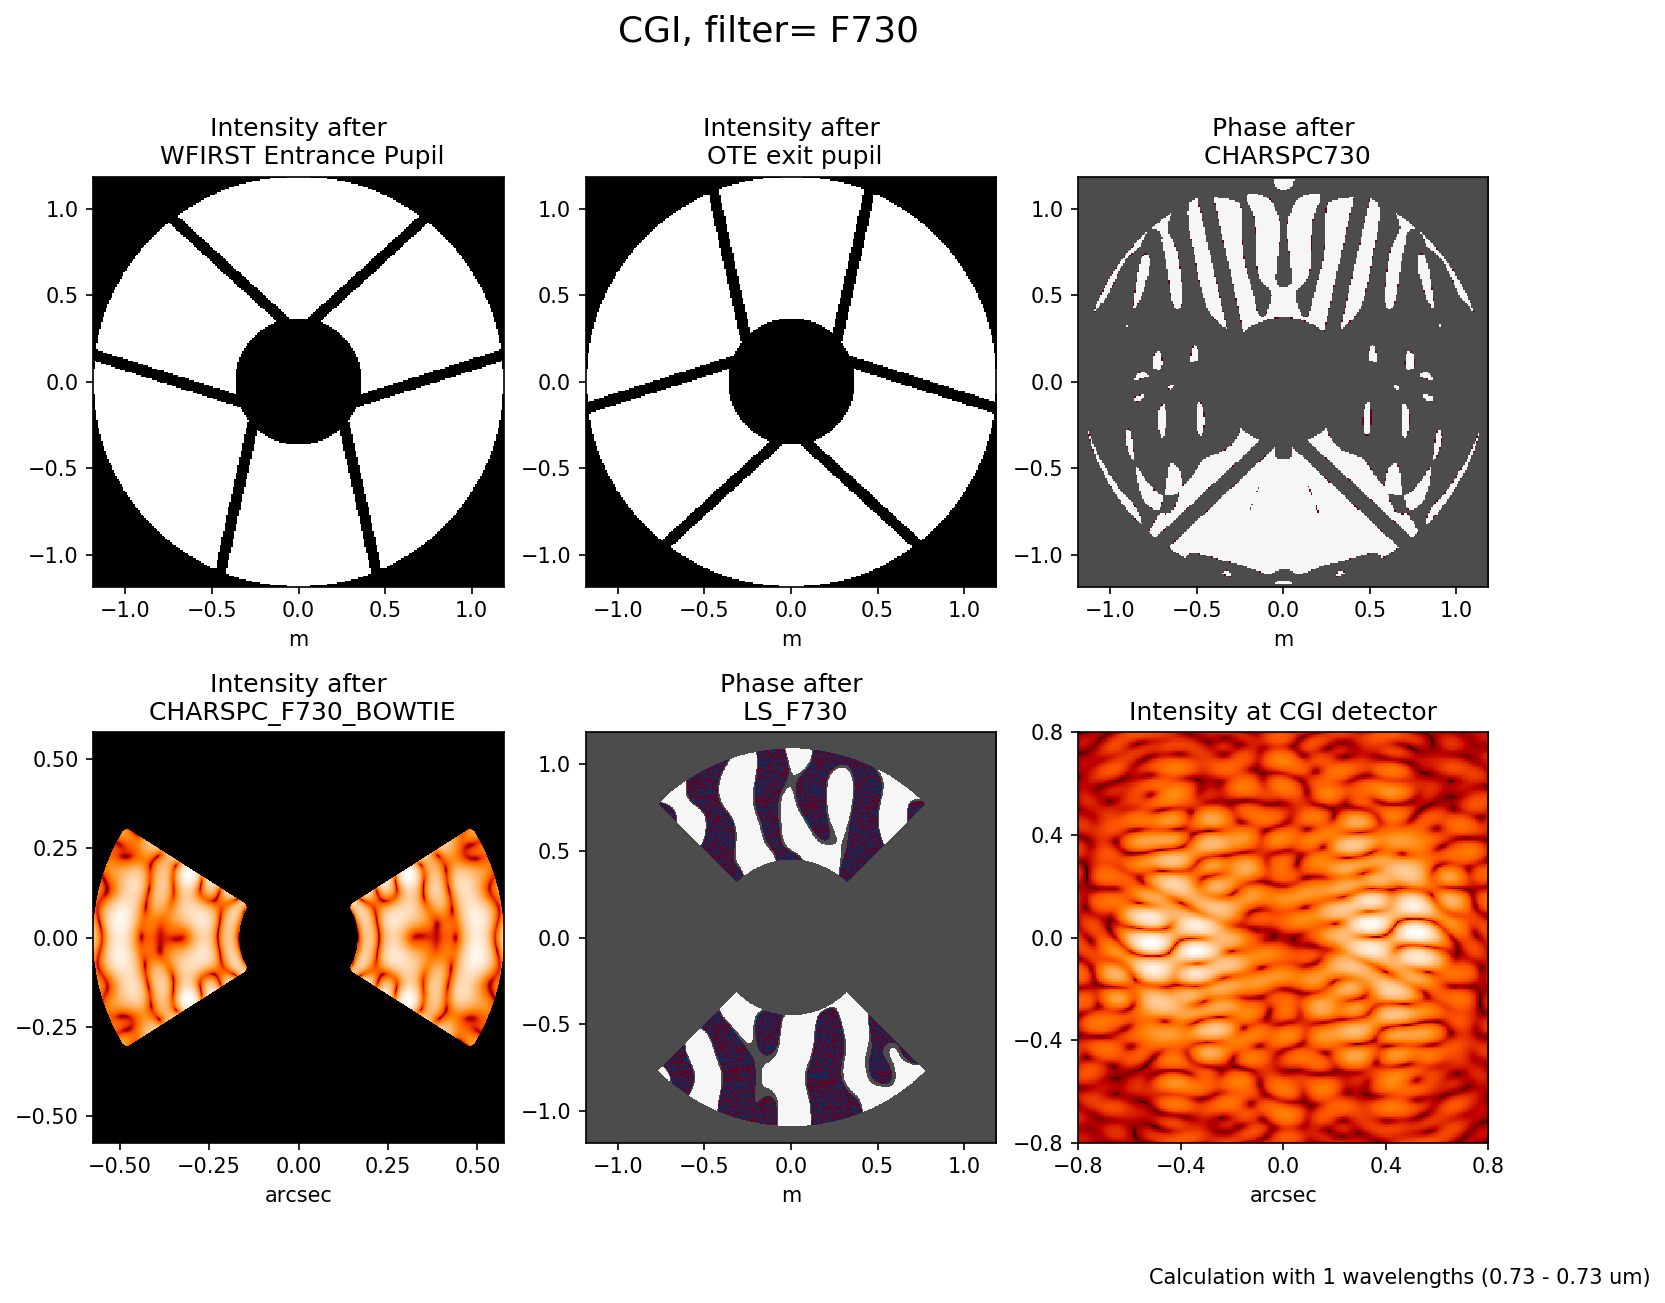

In [44]:
fov_as = 1.6

plt.figure(figsize=[12,9], dpi=150)
monopsf_no_offset = spc730.calc_psf(nlambda=1, fov_arcsec=fov_as, display=True)

## Calculate off-axis PSF.

[webbpsf] Set the following optical configuration:
[webbpsf] camera = IFS, filter = F730, apodizer = CHARSPC730, fpm = CHARSPC_F730_BOWTIE, lyotstop = LS_F730
[  poppy] No source spectrum supplied, therefore defaulting to 5700 K blackbody
[  poppy] Computing wavelength weights using synthetic photometry for F730...
[  poppy] PSF calc using fov_arcsec = 1.600000, oversample = 4, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /home/u21/kianmilani/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /home/u21/kianmilani/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /home/u21/

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 1.591 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 4


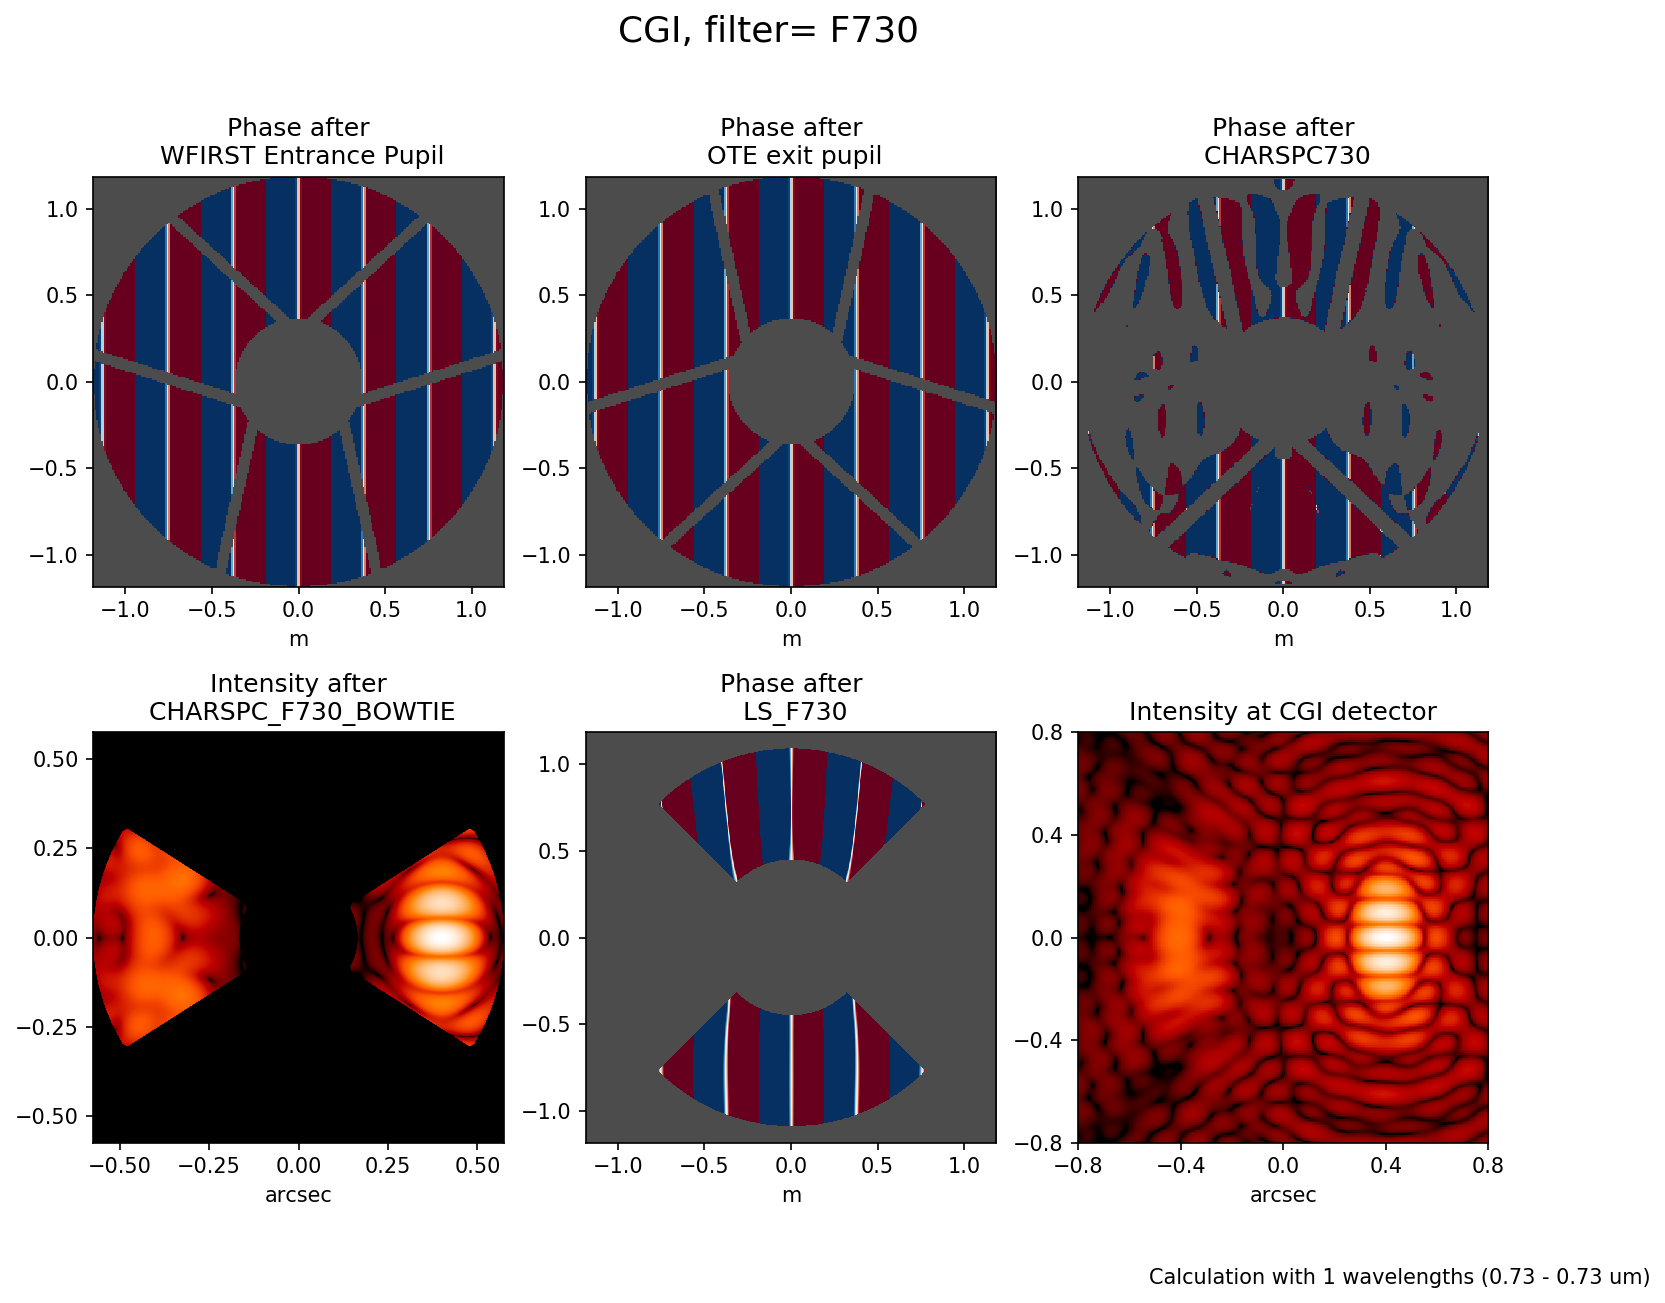

In [38]:
spc730 = wfirst.CGI(mode='CHARSPC_F730')
spc730.options['source_offset_r'] = 0.4 # arcsec
spc730.options['source_offset_theta'] = -90. # deg w.r.t. North
fov_as = 1.6

plt.figure(figsize=[12,9], dpi = 150)
monopsf_with_offset = spc730.calc_psf(nlambda=1, fov_arcsec=fov_as, display=True)

## Display both PSFs side-by-side.

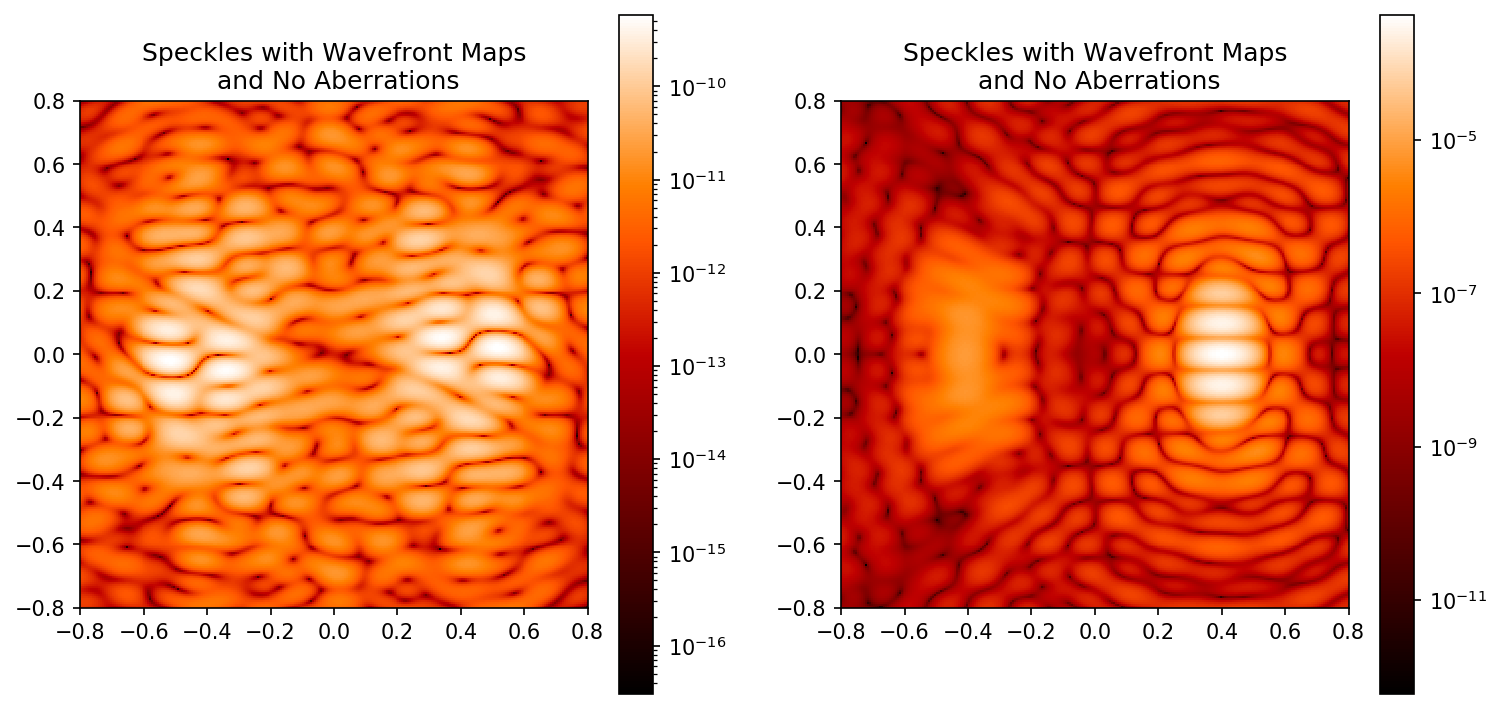

In [41]:
fig, ax  = plt.subplots( nrows=1, ncols=2, figsize=(12,6), dpi=150)

exmax = fov_as/2
extent = [-exmax,exmax,-exmax,exmax]

im = ax[0].imshow(monopsf_no_offset[0].data, norm=LogNorm(), cmap=plt.get_cmap('gist_heat'), extent=extent)
circ_in = Circle((0,0),2.6,edgecolor='cyan', facecolor='none', linewidth=2)
circ_out = Circle((0,0),9,edgecolor='cyan', facecolor='none', linewidth=2)
ax[0].add_patch(circ_in)
ax[0].add_patch(circ_out)
ax[0].set_title('Speckles with Wavefront Maps\n and No Aberrations')
fig.colorbar(im, ax=ax[0], shrink=1) 

im = ax[1].imshow(monopsf_with_offset[0].data, norm=LogNorm(), cmap=plt.get_cmap('gist_heat'), extent=extent)
circ_in = Circle((0,0),2.6,edgecolor='cyan', facecolor='none', linewidth=2)
circ_out = Circle((0,0),9,edgecolor='cyan', facecolor='none', linewidth=2)
ax[1].add_patch(circ_in)
ax[1].add_patch(circ_out)
ax[1].set_title('Speckles with Wavefront Maps\n and No Aberrations')
fig.colorbar(im, ax=ax[1], shrink=1) 